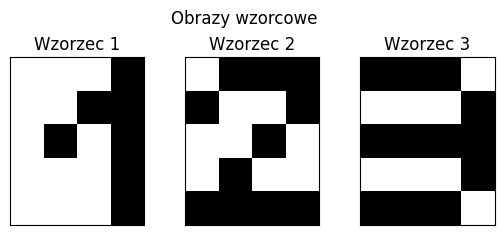

In [45]:
import math
import matplotlib.pyplot as plt

def odleglosc_miedzy_punktami_euklides(punkt_a, punkt_b):
    return math.sqrt((punkt_a[0] - punkt_b[0])**2 + (punkt_a[1] - punkt_b[1])**2)

def miara_niepodobienstwa_euklides(bitmapa_a, bitmapa_b):
    miara = 0
    for (pay, pax) in bitmapa_a:
        odl_min = float('inf')
        for (pby, pbx) in bitmapa_b:
            odl_akt = odleglosc_miedzy_punktami_euklides((pay, pax), (pby, pbx))
            odl_min = min(odl_min, odl_akt)
        miara += odl_min
    return miara

def miara_podobienstwa_obustronnego_euklides(bitmapa_a, bitmapa_b):
    niepodobienstwo_ab = miara_niepodobienstwa_euklides(bitmapa_a, bitmapa_b)
    niepodobienstwo_ba = miara_niepodobienstwa_euklides(bitmapa_b, bitmapa_a)
    return niepodobienstwo_ab + niepodobienstwo_ba

def macierz_do_lista_punktow(macierz):
    lista_punktow = []
    for i in range(len(macierz)):
        for j in range(len(macierz[i])):
            if macierz[i][j] == 1:
                lista_punktow.append((i, j))
    return lista_punktow

# Twoje macierze obrazów
znak_wzorcowy_1 = [
    [0, 0, 0, 1],
    [0, 0, 1, 1],
    [0, 1, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 1]
]
znak_wzorcowy_2 = [
    [0, 1, 1, 1],
    [1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 1, 1, 1]
]
znak_wzorcowy_3 = [
    [1, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 1, 1, 1],
    [0, 0, 0, 1],
    [1, 1, 1, 0]
]
wzorce=[znak_wzorcowy_1,znak_wzorcowy_2,znak_wzorcowy_3]

for i, wzorzec in enumerate(wzorce):
    wzorce2 = wzorzec
    plt.subplot(2,3, i + 1)
    plt.imshow(wzorce2, cmap='binary')
    plt.title(f"Wzorzec {i + 1}")
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Obrazy wzorcowe")
plt.show()

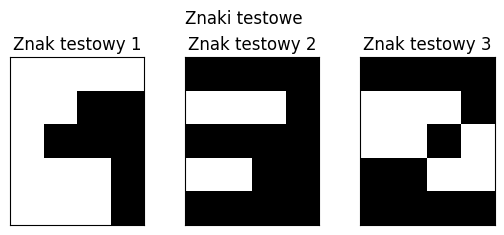

In [46]:
znak_testowy_1 = [
    [0, 0, 0, 0],
    [0, 0, 1, 1],
    [0, 1, 1, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 1]
]
znak_testowy_2 = [
    [1, 1, 1, 1],
    [0, 0, 0, 1],
    [1, 1, 1, 1],
    [0, 0, 1, 1],
    [1, 1, 1, 1]
]
znak_testowy_3 = [
    [1, 1, 1, 1],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [1, 1, 0, 0],
    [1, 1, 1, 1]
]
testy=[znak_testowy_1,znak_testowy_2,znak_testowy_3]

for i, test in enumerate(testy):
    test2 = test
    plt.subplot(2,3, i + 1)
    plt.imshow(test2, cmap='binary')
    plt.title(f"Znak testowy {i + 1}")
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Znaki testowe")
plt.show()

Test 1
Wynik miary podobieństwa obustronnego między wzorcem_1 i testem_1: 2.0
Wynik miary podobieństwa obustronnego między wzorcem_2 i testem_1: 15.06449510224598
Wynik miary podobieństwa obustronnego między wzorcem_3 i testem_1: 12.886349517372675
Test 2
Wynik miary podobieństwa obustronnego między wzorcem_1 i testem_2: 13.886349517372675
Wynik miary podobieństwa obustronnego między wzorcem_2 i testem_2: 8.0
Wynik miary podobieństwa obustronnego między wzorcem_3 i testem_2: 3.0
Test 3
Wynik miary podobieństwa obustronnego między wzorcem_1 i testem_3: 17.30056307974577
Wynik miary podobieństwa obustronnego między wzorcem_2 i testem_3: 3.0
Wynik miary podobieństwa obustronnego między wzorcem_3 i testem_3: 8.0


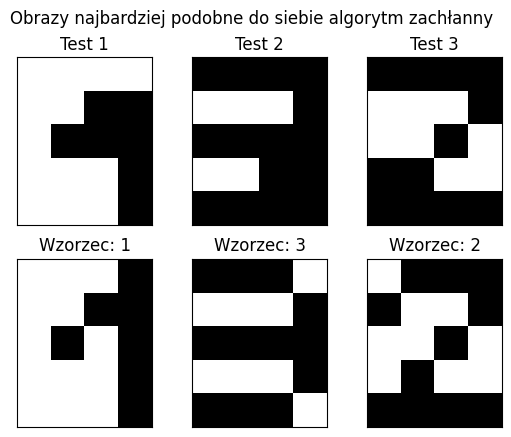

In [47]:
for i, test in enumerate(testy):
    print(f"Test {i + 1}")
    wyniki = []
    for j, wzorzec in enumerate(wzorce):
        wynik = miara_podobienstwa_obustronnego_euklides(
            macierz_do_lista_punktow(wzorzec),
            macierz_do_lista_punktow(test)
        )
        wyniki.append(wynik)
        print(f"Wynik miary podobieństwa obustronnego między wzorcem_{j + 1} i testem_{i + 1}: {wynik}")
    
    indeks = wyniki.index(min(wyniki))
    
    plt.subplot(2, 3, i + 1)
    plt.imshow(test, cmap='binary')
    plt.title(f"Test {i + 1}")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 3, i + 4)
    plt.imshow(wzorce[indeks], cmap='binary')
    plt.title(f"Wzorzec: {indeks + 1}")
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Obrazy najbardziej podobne do siebie algorytm zachłanny")
plt.show()